# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


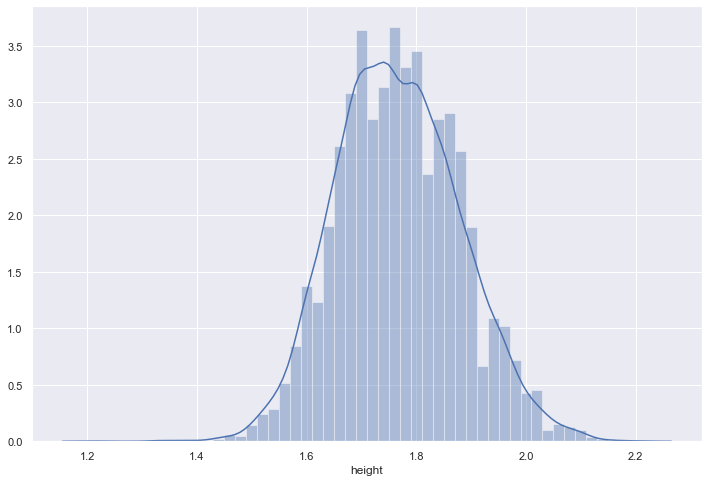

In [6]:
sns.distplot(athletes['height'].dropna())


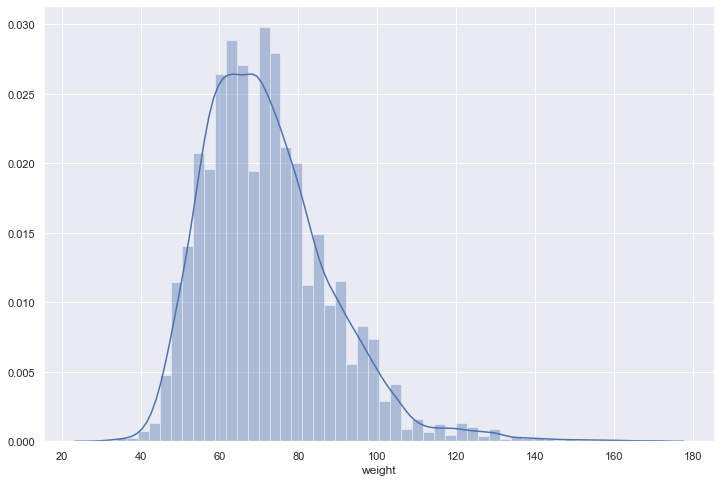

In [7]:
sns.distplot(athletes['weight'].dropna())

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

__LEMBRETE__
* Se o valor-p for menor que $\alpha$, então $t^{*}$ caiu dentro da região crítica, e portanto devemos rejeitar $H_{0}$.
* Se o valor-p for maior que $\alpha$, então $t^{*}$ caiu na região de aceitação e devemos não rejeitar $H_{0}$.

In [8]:
import statsmodels.api as sm
height_sample = get_sample(athletes, col_name='height', n=3000)

In [9]:
def q1():
    
    # A função sct.shapiro() retorna uma tupla com dois valores (test statistic, p-value), então queremos o valor de p-value, posição [1]
    p_value = sct.shapiro(height_sample)[1]
    alpha = 0.05
    
    return False if p_value < alpha else True

q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

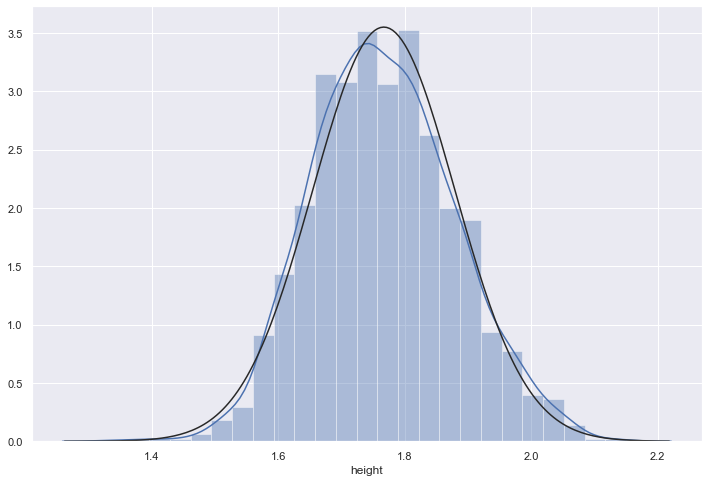

In [10]:
sns.distplot(height_sample, fit=sct.norm, bins=25)

`O histograma indica haver distribuição normal da amostra enquanto o resultado da teste de Shapiro indica não haver.`

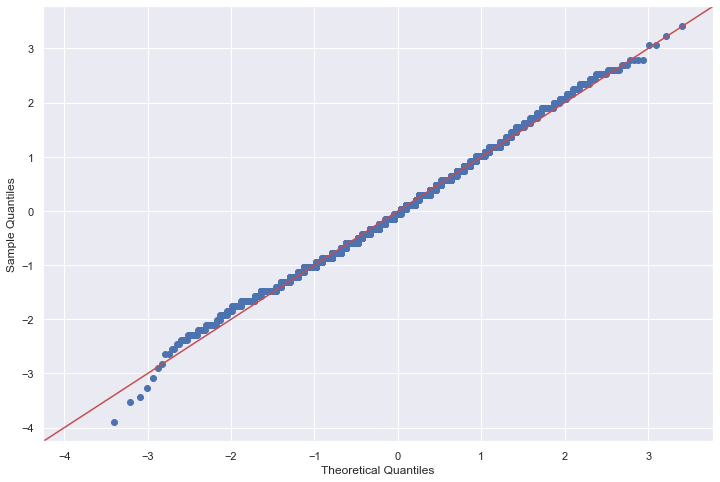

In [11]:
sm.qqplot(height_sample, fit=True, line="45");

`O Q-Q Plot indica haver uma aproximação da distribuição da amostra com a distribuição teórica (Distribuição Normal).`

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [12]:
def q2():
    
    # Da mesma forma que sct.shapiro(), sct.jarque_bera() retorna uma tupla com dois valores (test statistic, p-value)
    p_value = sct.jarque_bera(height_sample)[1]
    alpha = 0.05
    
    return False if p_value < alpha else True

q2()

False

__Para refletir__:

* Esse resultado faz sentido?

`Não`

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [13]:
weight_sample = get_sample(athletes, col_name='weight', n=3000)

In [14]:
def q3():
    p_value = sct.normaltest(weight_sample).pvalue
    alpha = 0.05
    
    return False if p_value < alpha else True

q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

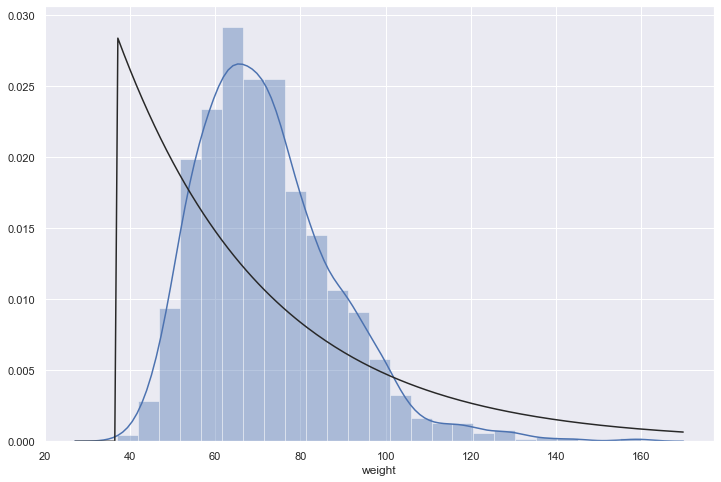

In [15]:
# Plotando o Histrograma com uma Distribuição Exponencial de referência para comparação.
sns.distplot(weight_sample, fit=sct.expon, bins=25)

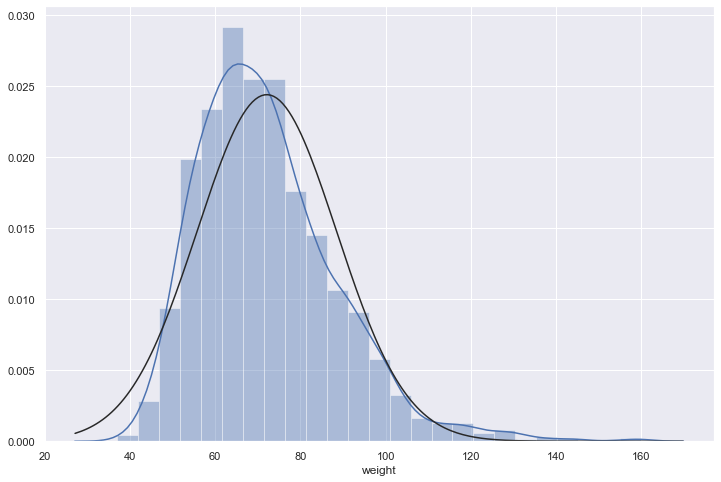

In [16]:
# Plotando o Histograma com uma Distribuição Normal de referência para comparação.
sns.distplot(weight_sample, fit=sct.norm, bins=25)

`O histograma indica haver mais aproximação a uma Distribuição Normal do que Exponencial.
Portanto, o resultado do teste e forma dos gráficos não são condizentes.`

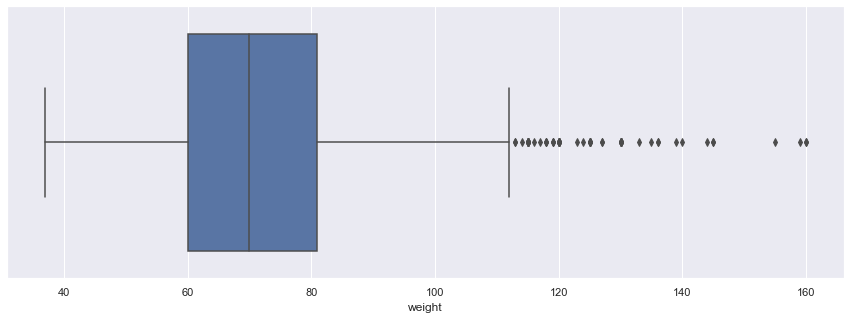

In [17]:
figsize(15,5)
sns.boxplot(weight_sample)

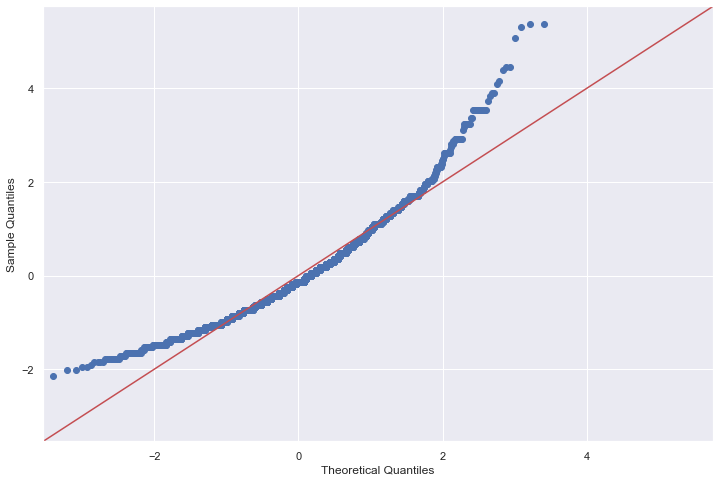

In [18]:
figsize(12, 8)
sm.qqplot(weight_sample, fit=True, line="45");

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [19]:
weight_log = np.log(weight_sample)

In [20]:
def q4():
    p_value = sct.normaltest(weight_log).pvalue
    alpha = 0.05
    
    return False if p_value < alpha else True

q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

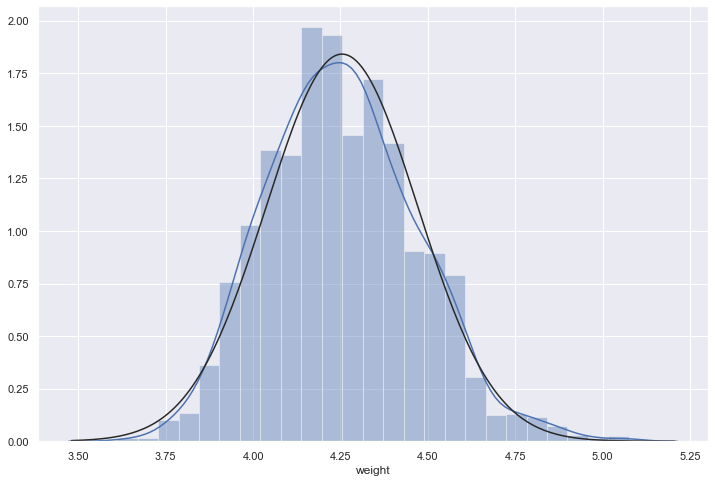

In [21]:
sns.distplot(weight_log, fit=sct.norm, bins=25)

`A transformação logarítmica procura aderir os dados a uma Distribuição Normal.
Entretanto, mesmo após a transformação, o teste indica não haver Distribuição Normal.`

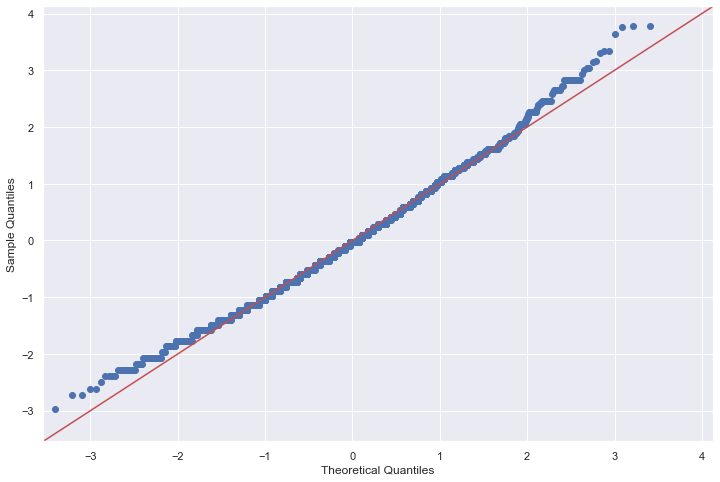

In [22]:
sm.qqplot(weight_log, fit=sct.norm, line="45");

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [ ]:
# Definindo alpha == 0.05
alpha = 0.05

In [ ]:
bra = athletes.query('nationality == "BRA"')['height']
usa = athletes.query('nationality == "USA"')['height']
can = athletes.query('nationality == "CAN"')['height']

In [ ]:
def q5():
    p_value = sct.ttest_ind(bra, usa, nan_policy='omit', equal_var=False).pvalue
    
    return False if p_value < alpha else True
    
q5()

In [ ]:
sns.distplot(bra, hist_kws={'alpha': 0.4})

In [ ]:
sns.distplot(usa)

In [ ]:
sns.distplot(can)

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [ ]:
def q6():
    p_value = sct.ttest_ind(bra, can, nan_policy='omit', equal_var=False).pvalue

    return False if p_value <= alpha else True

q6()

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [ ]:
def q7():
    p_value = sct.ttest_ind(usa, can, equal_var=False, nan_policy='omit').pvalue
    
    return float(round(p_value, 8))

q7()

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?